# BIOS512 Assignment #3

Import the 📈Tidyverse into your `R` session

In [1]:
library('tidyverse')

Warning message:
“Failed to locate timezone database”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In this assignment we'll be using data from the [TidyTuesday Project](https://github.com/rfordatascience/tidytuesday). Specifically, we'll investigate vaccination rates at US schools. A `CSV` file of the data is located at:  

[https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv)

Get the "raw" data URL and import it into your `R` session using `read_csv`. Remember to capture the data under a variable name of your choosing!

In [2]:
df_vacc_rates <- readr::read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-25/measles.csv')
df_vacc_rates |> head()

Rows: 66113 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): state, year, name, type, city, county
dbl (8): index, enroll, mmr, overall, xmed, xper, lat, lng
lgl (2): district, xrel

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


index,state,year,name,type,city,county,district,enroll,mmr,overall,xrel,xmed,xper,lat,lng
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Arizona,2018-19,A J Mitchell Elementary,Public,Nogales,Santa Cruz,NA,51,100,-1,NA,NA,NA,31.34782,-110.9380
2,Arizona,2018-19,Academy Del Sol,Charter,Tucson,Pima,NA,22,100,-1,NA,NA,NA,32.22192,-110.8961
3,Arizona,2018-19,Academy Del Sol - Hope,Charter,Tucson,Pima,NA,85,100,-1,NA,NA,NA,32.13049,-111.1170
4,Arizona,2018-19,Academy Of Mathematics And Science South,Charter,Phoenix,Maricopa,NA,60,100,-1,NA,NA,NA,33.48545,-112.1306
5,Arizona,2018-19,Acclaim Academy,Charter,Phoenix,Maricopa,NA,43,100,-1,NA,2.33,2.33,33.49562,-112.2247
6,Arizona,2018-19,Alfred F Garcia,Public,Phoenix,Maricopa,NA,36,100,-1,NA,NA,NA,33.43532,-112.1168


The `mmr` column has holds 🤒 measles, mumps, rubella 🤒 vaccination rates for students in each respective school. **If the `mmr` value is not available for a school the `mmr` value is set to -1 in this data set.** 

The target `mmr` vaccination rate as [recommended by the CDC](https://www.cdc.gov/mmwr/preview/mmwrhtml/mm5632a3.htm) for schools is 95%. 

**Calculate the fraction of schools per state that have vaccination rates greater than the CDC 95%. Capture the output as a table called `df_vacc_rates`.**

You'll need to do use `filter`, `group_by`, and `summarize`. 

I.e.
1. Filter out schools that don't report `mmr` vaccination rate (keep schools where `mmr >= 0`).
1. Group the data by `state`.
1. Summarize fracion of vaccination rates above 95%.

💡Remember `n()` stands for the number or records in a group. Also, `sum(mmr >= 95, na.rm=TRUE)` will count the number of values above or equal to 95.💡

In [3]:
# create the df_vacc_rates here

df_vacc_rates |>
    filter(mmr > 0) |>
    group_by(state) |>
    mutate(n = n(),
          total_95_or_more = sum(mmr>= 95, na.rm = TRUE),
          n_frac = total_95_or_more / n) 

index,state,year,name,type,city,county,district,enroll,mmr,overall,xrel,xmed,xper,lat,lng,n,total_95_or_more,n_frac
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>
1,Arizona,2018-19,A J Mitchell Elementary,Public,Nogales,Santa Cruz,NA,51,100,-1,NA,NA,NA,31.34782,-110.9380,1171,593,0.5064048
2,Arizona,2018-19,Academy Del Sol,Charter,Tucson,Pima,NA,22,100,-1,NA,NA,NA,32.22192,-110.8961,1171,593,0.5064048
3,Arizona,2018-19,Academy Del Sol - Hope,Charter,Tucson,Pima,NA,85,100,-1,NA,NA,NA,32.13049,-111.1170,1171,593,0.5064048
4,Arizona,2018-19,Academy Of Mathematics And Science South,Charter,Phoenix,Maricopa,NA,60,100,-1,NA,NA,NA,33.48545,-112.1306,1171,593,0.5064048
5,Arizona,2018-19,Acclaim Academy,Charter,Phoenix,Maricopa,NA,43,100,-1,NA,2.33,2.33,33.49562,-112.2247,1171,593,0.5064048
6,Arizona,2018-19,Alfred F Garcia,Public,Phoenix,Maricopa,NA,36,100,-1,NA,NA,NA,33.43532,-112.1168,1171,593,0.5064048
7,Arizona,2018-19,All Aboard Charter,Charter,Phoenix,Maricopa,NA,24,100,-1,NA,NA,4.17,33.52332,-112.1338,1171,593,0.5064048
8,Arizona,2018-19,Amerischools Academy - Yuma South Campus,Charter,Yuma,Yuma,NA,22,100,-1,NA,NA,NA,32.69001,-114.6234,1171,593,0.5064048
9,Arizona,2018-19,Arizona Cultural Academy,Private,Phoenix,Maricopa,NA,26,100,-1,NA,NA,NA,33.37562,-111.9929,1171,593,0.5064048


Which state (of those that report `mmr`) has the smallest fraction of schools above the CDC target vaccination rate of 95%?  

In [4]:
df_vacc_rates |>
    filter(mmr > 0) |>
    group_by(state) |>
    mutate(n = n(),
          total_95_or_more = sum(mmr>= 95, na.rm = TRUE),
          n_frac = total_95_or_more / n) |>
    summarize(smallestfrac = min(n_frac))

state,smallestfrac
<chr>,<dbl>
Arizona,0.506404782
Arkansas,0.003527337
California,0.888506151
Colorado,0.623092236
Connecticut,0.811544992
Illinois,0.896825397
Maine,0.473389356
Massachusetts,0.865828092
Minnesota,0.473948525


Answer: Arkansas

**Make a ECDF plot of the school vaccination rates in North Carolina.** Use the `overall` column which reports the "overall" vaccination rate at each school.

❗️Remember, you can calculate the `y` value for ECDF charts using `row_number`, `mutate`, and `arrange`.

In [5]:
nc_schools <- df_vacc_rates %>% dplyr::filter(state == "North Carolina")

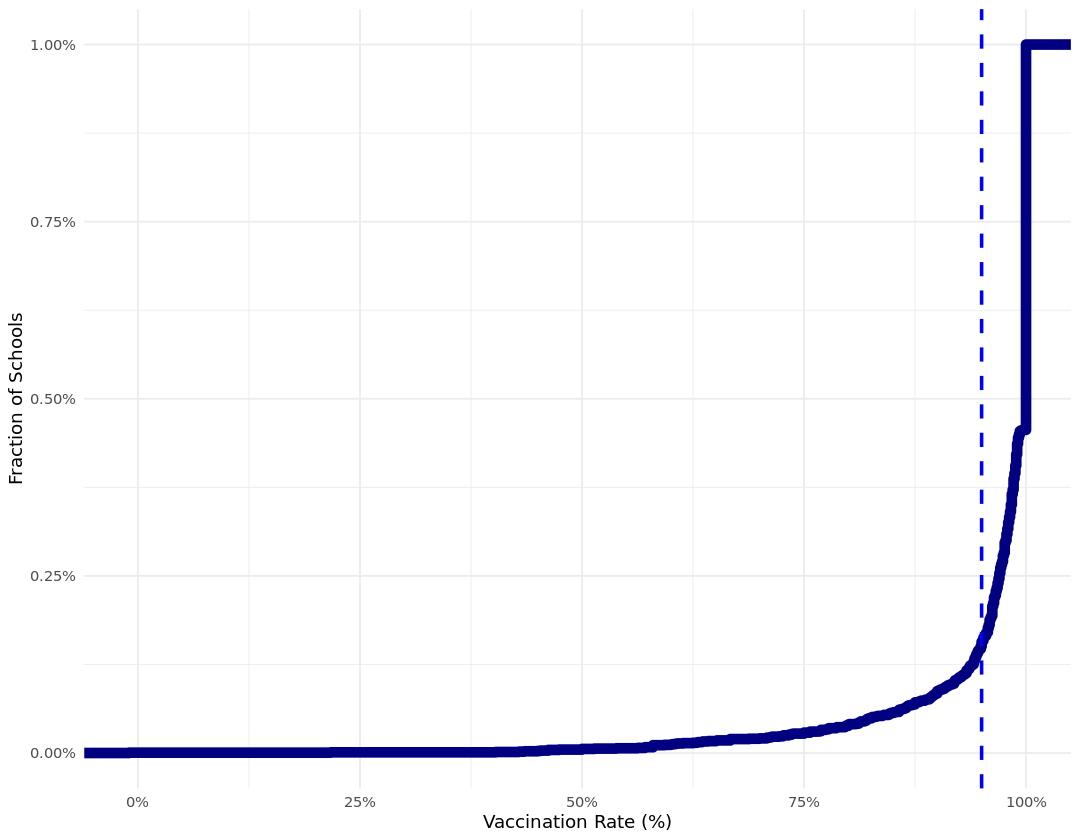

In [9]:
options(repr.plot.res = 120, repr.plot.height = 7, repr.plot.width = 9)

p = ggplot(nc_schools, aes(x = overall)) +
  geom_step(stat = "ecdf", size = 3, color = "navy") +
  labs(
    x = "Vaccination Rate (%)",
    y = "Fraction of Schools",
  ) +
  theme_minimal() +
  scale_x_continuous(labels = scales::percent_format(scale = 1)) +
  scale_y_continuous(labels = scales::percent_format(scale = 1)) +
    geom_vline(xintercept = 95, linetype = "dashed", color = "blue", size = 1.0)
p

(My solution is below if you want to peek 👀. Uncomment the code, change the cell to `markdown`, and exectute it.)

![](https://github.com/chuckpr/BIOS512/blob/main/assignments/measles-chart.png?raw=true)

Is the median vaccination rate for NC schools above the CDC recommended target?

In [14]:
median_nc_rate <- median(nc_schools$overall)
cat("Median vaccination rate for North Carolina school:", median_nc_rate, "\n")

Median vaccination rate for North Carolina school: 100 


Answer: Yes, the median vaccination rate for NC schools is above the CDC recommended target.